In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import yaml
import shutil
from datetime import datetime

sns.set_theme()

In [2]:
### All global variables that would be passed as arguments in a python script
input_csv_file = "/home/nils/Downloads/latency_per_task_buffer.csv"


def load_data():
    df = pd.read_csv(input_csv_file)
    # Remove rows that are equal to the header
    header = df.columns.tolist()
    df = df[~(df == header).all(axis=1)]
    
    for col in ['SequenceNumber', 'LatencyInUS','NumberOfTuplesInput','Selectivity','NumberOfWorkerThreads','Skewness']:
        df[col] = df[col].astype(float).fillna(0.0)

    df = df.sort_values(by='SequenceNumber').reset_index(drop=True)
    return df

df = load_data()
df

,SequenceNumber,LatencyInUS,NumberOfTuplesInput,Selectivity,ProviderName,NumberOfWorkerThreads,Skewness
0,1.0,1138.0,1000.0,10.0,Compilation,1.0,0.01
1,1.0,2691.0,1000.0,90.0,Compilation,1.0,0.75
2,1.0,3089.0,1000.0,50.0,Compilation,4.0,1.00
3,1.0,3049.0,1000.0,50.0,Compilation,4.0,1.00
4,1.0,2647.0,1000.0,90.0,Compilation,1.0,0.75
...,...,...,...,...,...,...,...
1196167,8857.0,5596.0,10.0,50.0,Compilation,4.0,1.00
1196168,8857.0,7711.0,10.0,50.0,Compilation,16.0,1.00
1196169,8857.0,5113.0,10.0,90.0,Compilation,4.0,1.00
1196170,8857.0,5658.0,10.0,90.0,Compilation,1.0,1.00


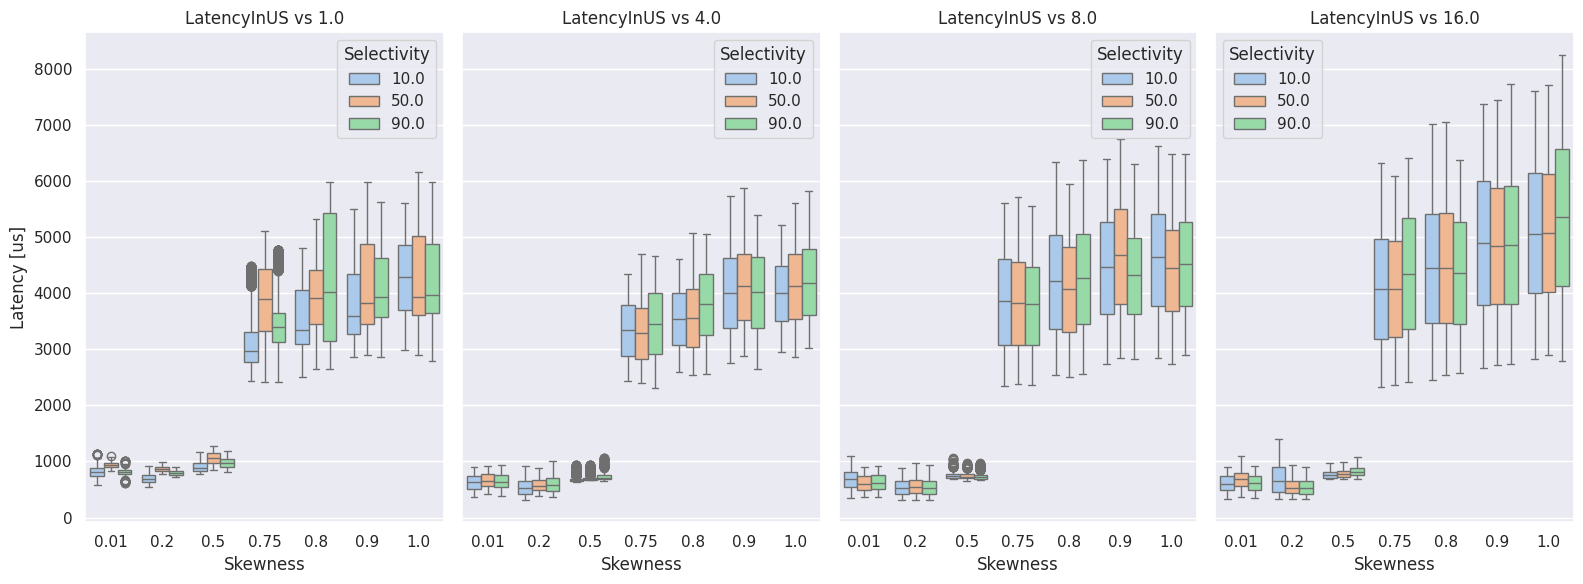

In [3]:
df = load_data()

interesting_param = "NumberOfWorkerThreads"
x_param="Skewness"
y_params = ["LatencyInUS"]
y_param_units = ["Latency [us]"]
hue="Selectivity"

unique_params = df[interesting_param].unique()
n_params = len(unique_params)
fig, axes = plt.subplots(1, n_params, figsize=(16, 6), squeeze=False, sharey='row')
for idx, param in enumerate(unique_params):
    subset = df[df[interesting_param] == param]

    
    ax = axes[0][idx]
    sns.boxplot(x=x_param, y=y_params[0], hue=hue, data=subset, ax=ax, palette="pastel")
    ax.set_title(f"{y_params[0]} vs {param}")
    ax.set_xlabel(x_param)
    ax.set_ylabel(y_param_units[0])
    #ax.set_ylim([0, .04])

plt.tight_layout()
#plt.savefig(os.path.join(output_folder_plots, f"plots.png"))
plt.show()
plt.close()

In [4]:
df = load_data()

x_param="SequenceNumber"
y_params = ["NumberOfTuplesInput"]
y_param_units = ["No. Tuples"]
hue="Skewness"


subset = df[df['NumberOfWorkerThreads'] == 1]
subset = subset[subset['Selectivity'] == 10]
subset = subset[['SequenceNumber', 'NumberOfTuplesInput', 'Skewness']]
subset

,SequenceNumber,NumberOfTuplesInput,Skewness
0,1.0,1000.0,0.01
58,1.0,1000.0,0.80
67,1.0,1000.0,0.75
70,1.0,1000.0,0.75
75,1.0,1000.0,0.75
...,...,...,...
1196108,8856.0,10.0,1.00
1196128,8856.0,10.0,1.00
1196136,8857.0,10.0,1.00
1196150,8857.0,10.0,1.00


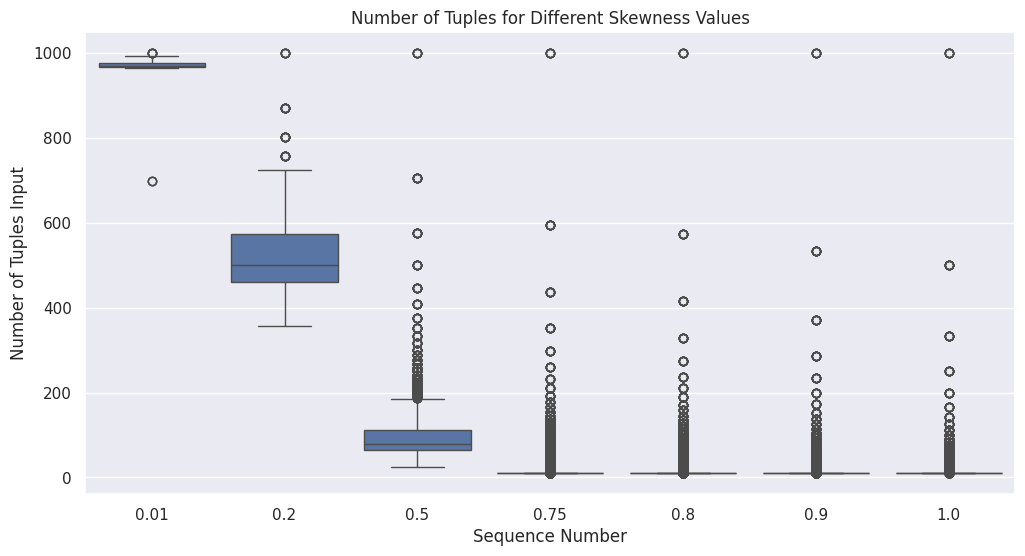

In [18]:
df = load_data()

x_param="SequenceNumber"
y_params = ["NumberOfTuplesInput"]
y_param_units = ["No. Tuples"]
#hue="Skewness"


subset = df[df['NumberOfWorkerThreads'] == 1]
subset = subset[subset['Selectivity'] == 10]
subset = subset[['SequenceNumber', 'NumberOfTuplesInput', 'Skewness']]


# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='Skewness', y='NumberOfTuplesInput', data=subset)
plt.title('Number of Tuples for Different Skewness Values')
plt.xlabel('Sequence Number')
plt.ylabel('Number of Tuples Input')
plt.show()


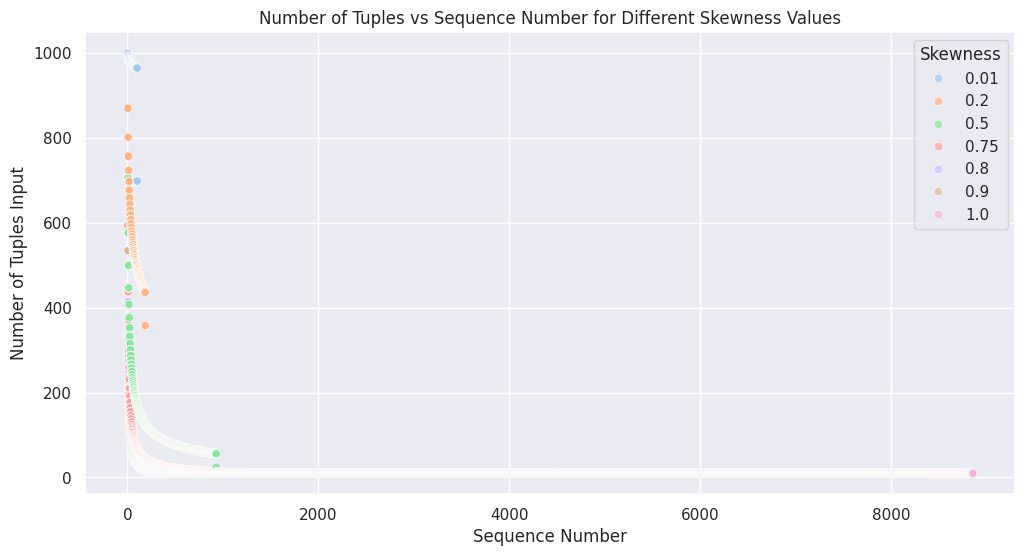

In [19]:
df = load_data()

x_param="SequenceNumber"
y_params = ["NumberOfTuplesInput"]
y_param_units = ["No. Tuples"]
hue="Skewness"


subset = df[df['NumberOfWorkerThreads'] == 1]
subset = subset[subset['Selectivity'] == 10]
subset = subset[['SequenceNumber', 'NumberOfTuplesInput', 'Skewness']]


# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SequenceNumber', y='NumberOfTuplesInput', hue='Skewness', data=subset, palette='pastel', alpha=0.7)
plt.title('Number of Tuples vs Sequence Number for Different Skewness Values')
plt.xlabel('Sequence Number')
plt.ylabel('Number of Tuples Input')
plt.legend(title='Skewness')
plt.show()
